<a href="https://colab.research.google.com/github/rajveer0104/Deep-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x79692c370c50> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
cf=keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name=None,
)

In [ ]:
elephant = Image.open("/content/istockphoto-1452952557-612x612.jpg").resize(IMAGE_SHAPE)
elephant



FileNotFoundError: [Errno 2] No such file or directory: '/content/istockphoto-1452952557-612x612.jpg'

In [ ]:
elephant=np.array(elephant)/255.0
elephant.shape

NameError: name 'elephant' is not defined

In [ ]:
elephant[np.newaxis,...].shape

NameError: name 'elephant' is not defined

In [ ]:
result=cf.predict(elephant[np.newaxis,...])
result.shape

NameError: name 'elephant' is not defined

In [ ]:
predicted_class=np.argmax(result)
predicted_class

NameError: name 'result' is not defined

In [ ]:
classes

NameError: name 'classes' is not defined

In [ ]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib

data_dir = pathlib.Path('./datasets/flower_photos/flower_photos')
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images:", image_count)

Total images: 3670


In [ ]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/488849503_63a290a8c2_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/921984328_a60076f070_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3663244576_97f595cf4a.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/174109630_3c544b8a2f.jpg')]

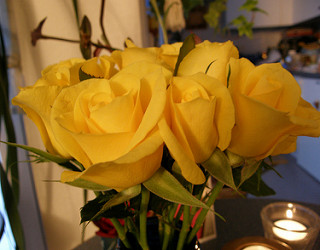

In [ ]:
Image.open(roses[41])


In [ ]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/flower_photos/tulips/8904780994_8867d64155_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/9947385346_3a8cacea02_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/430785322_7ddef64c68_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/14651385476_7ccb20e594_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/13976191172_6f23a0b313.jpg')]

In [ ]:

flower_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),

}

In [ ]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
X,Y=[],[]
for flower_name,flower_img in flower_image_dict.items():
  for image in flower_img:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,IMAGE_SHAPE)
    X.append(resized_img)
    Y.append(flower_name)


In [ ]:
X=np.array(X)
Y=np.array(Y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

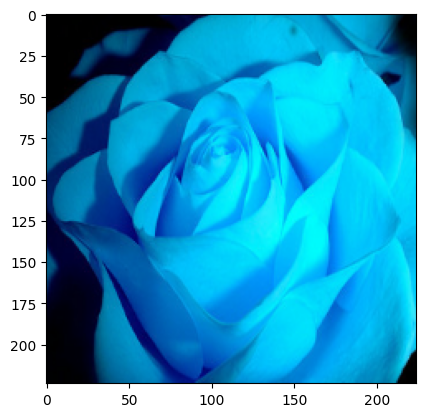

In [ ]:
plt.imshow(X_train[1])

In [ ]:
result=cf.predict(np.array([X_train[1]]))
result=np.argmax(result)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


np.int64(107)

In [ ]:

extractor=keras.applications.MobileNet(
    input_shape=(224,224,3),

    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name=None,
)

In [ ]:
model=tf.keras.Sequential([
    extractor,
    tf.keras.layers.Dense(5)
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 1000)           │     4,253,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,258,869 (16.25 MB)

 Trainable params: 4,236,981 (16.16 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(X_train_scaled,Y_train_encoded,epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 585s 7s/step - accuracy: 0.6643 - loss: 1.5578
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 564s 7s/step - accuracy: 0.7259 - loss: 1.4684
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 625s 7s/step - accuracy: 0.7026 - loss: 1.4067
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 614s 7s/step - accuracy: 0.6942 - loss: 1.3473
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 561s 6s/step - accuracy: 0.7286 - loss: 1.2786


In [ ]:
Y_train.shape

(2752,)